### Pizza Sales
##### Paso 1: Exploración de datos (EDA)
* Carga y visualización inicial de los datos.
* Estadísticas descriptivas.
* Visualización de tendencias y patrones.
##### Paso 2: Modelado con regresión lineal
* Preparación de los datos.
* Entrenamiento del modelo de regresión lineal.
* Proyección de las ventas.
##### Paso 3: Fórmula de la regresión para Power BI
* Cálculo de los coeficientes de la regresión.
* Fórmula para replicar en Power BI.

In [154]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [155]:
# Cargar los datos desde un archivo CSV
df = pd.read_csv('./A_year_of_pizza_sales_from_a_pizza_place_872_68.csv', index_col=False)

# Diccionario con descripciones de las pizzas
pizza_descriptions = {
    'classic_dlx': ("The Classic Deluxe Pizza", "Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon"),
    'big_meat': ("The Big Meat Pizza", "Bacon, Pepperoni, Italian Sausage, Chorizo Sausage"),
    'pepperoni': ("The Pepperoni Pizza", "Mozzarella Cheese, Pepperoni"),
    'hawaiian': ("The Hawaiian Pizza", "Sliced Ham, Pineapple, Mozzarella Cheese"),
    'pep_msh_pep': ("The Pepperoni, Mushroom, and Peppers Pizza", "Pepperoni, Mushrooms, and Green Peppers"),
    'ital_cpcllo': ("The Italian Capocollo Pizza", "Capocollo, Red Peppers, Tomatoes, Goat Cheese, Garlic, Oregano"),
    'napolitana': ("The Napolitana Pizza", "Tomatoes, Anchovies, Green Olives, Red Onions, Garlic"),
    'the_greek': ("The Greek Pizza", "Kalamata Olives, Feta Cheese, Tomatoes, Garlic, Beef Chuck Roast, Red Onions"),
    'thai_ckn': ("The Thai Chicken Pizza", "Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce"),
    'bbq_ckn': ("The Barbecue Chicken Pizza", "Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce"),
    'southw_ckn': ("The Southwest Chicken Pizza", "Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce"),
    'cali_ckn': ("The California Chicken Pizza", "Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese"),
    'ckn_pesto': ("The Chicken Pesto Pizza", "Chicken, Tomatoes, Red Peppers, Spinach, Garlic, Pesto Sauce"),
    'ckn_alfredo': ("The Chicken Alfredo Pizza", "Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce"),
    'brie_carre': ("The Brie Carre Pizza", "Brie Carre Cheese, Prosciutto, Caramelized Onions, Pears, Thyme, Garlic"),
    'calabrese': ("The Calabrese Pizza", "‘Nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic"),
    'soppressata': ("The Soppressata Pizza", "Soppressata Salami, Fontina Cheese, Mozzarella Cheese, Mushrooms, Garlic"),
    'sicilian': ("The Sicilian Pizza", "Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic"),
    'ital_supr': ("The Italian Supreme Pizza", "Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic"),
    'peppr_salami': ("The Pepper Salami Pizza", "Genoa Salami, Capocollo, Pepperoni, Tomatoes, Asiago Cheese, Garlic"),
    'prsc_argla': ("The Prosciutto and Arugula Pizza", "Prosciutto di San Daniele, Arugula, Mozzarella Cheese"),
    'spinach_supr': ("The Spinach Supreme Pizza", "Spinach, Red Onions, Pepperoni, Tomatoes, Artichokes, Kalamata Olives, Garlic, Asiago Cheese"),
    'spicy_ital': ("The Spicy Italian Pizza", "Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic"),
    'mexicana': ("The Mexicana Pizza", "Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic"),
    'four_cheese': ("The Four Cheese Pizza", "Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic"),
    'five_cheese': ("The Five Cheese Pizza", "Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic"),
    'spin_pesto': ("The Spinach Pesto Pizza", "Spinach, Artichokes, Tomatoes, Sun-dried Tomatoes, Garlic, Pesto Sauce"),
    'veggie_veg': ("The Vegetables + Vegetables Pizza", "Mushrooms, Tomatoes, Red Peppers, Green Peppers, Red Onions, Zucchini, Spinach, Garlic"),
    'green_garden': ("The Green Garden Pizza", "Spinach, Mushrooms, Tomatoes, Green Olives, Feta Cheese"),
    'mediterraneo': ("The Mediterranean Pizza", "Spinach, Artichokes, Kalamata Olives, Sun-dried Tomatoes, Feta Cheese, Plum Tomatoes, Red Onions"),
    'spinach_fet': ("The Spinach and Feta Pizza", "Spinach, Mushrooms, Red Onions, Feta Cheese, Garlic"),
    'ital_veggie': ("The Italian Vegetables Pizza", "Eggplant, Artichokes, Tomatoes, Zucchini, Red Peppers, Garlic, Pesto Sauce")
}

# Crear y eliminar columnas en el dataframe
df['name_description'] = df['name'].map(lambda x: pizza_descriptions.get(x, ('Unknown Pizza', ''))[0])
df['description'] = df['name'].map(lambda x: pizza_descriptions.get(x, ('', 'Unknown Description'))[1])
df.drop(['Unnamed: 0', 'X'], axis=1, inplace=True)

# Visualizar las primeras filas del dataframe modificado
df.head()

,id,date,time,name,size,type,price,name_description,description
0,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,The Hawaiian Pizza,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,The Classic Deluxe Pizza,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00,The Mexicana Pizza,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
3,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,The Thai Chicken Pizza,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
4,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50,The Five Cheese Pizza,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."


### REVISIÓN DE DATOS

In [156]:
# Obtener estadísticas descriptivas
df.describe(include='all')

,id,date,time,name,size,type,price,name_description,description
count,49574,49574,49574,49574,49574,49574,49574.000000,49574,49574
unique,21350,358,16382,32,5,4,NaN,32,32
top,2015-018845,2015-11-26,12:25:12,classic_dlx,L,classic,NaN,The Classic Deluxe Pizza,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
freq,28,266,28,2453,18956,14888,NaN,2453,2453
mean,NaN,NaN,NaN,NaN,NaN,NaN,16.497762,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.621954,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,9.750000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,12.750000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,16.500000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,20.250000,NaN,NaN


In [157]:
# Convertir la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Visualizar la tendencia de ventas a lo largo del tiempo
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df, x='date', y='price')
# plt.title('Tendencia de ventas a lo largo del tiempo')
# plt.xlabel('Fecha')
# plt.ylabel('Precio de venta')
# plt.xticks(rotation=45)
# plt.show()


c:\Users\ivana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


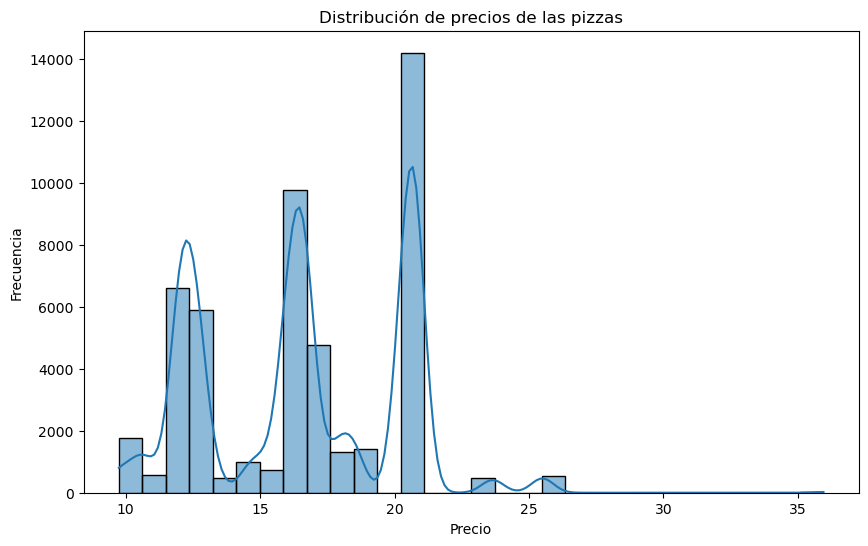

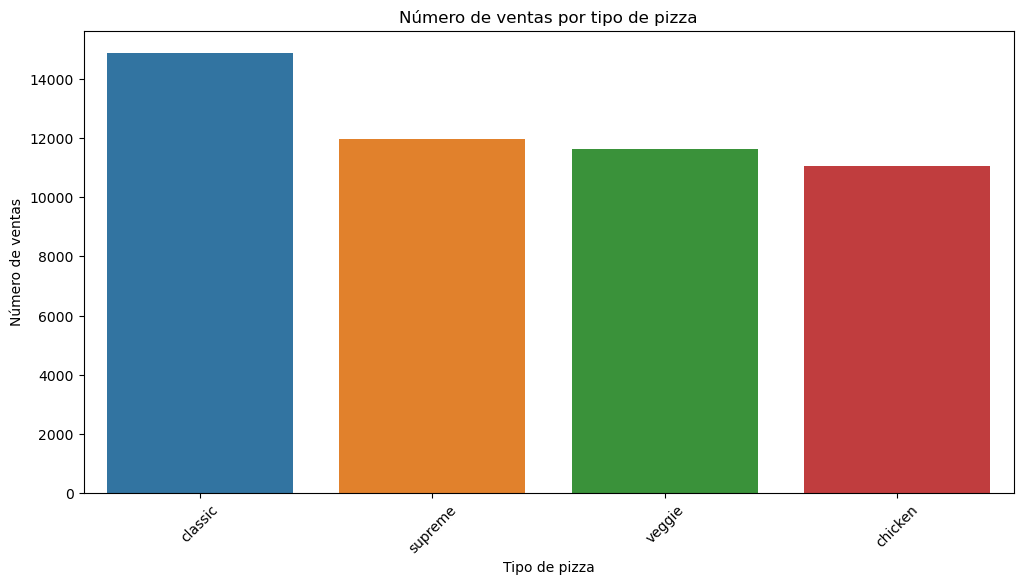

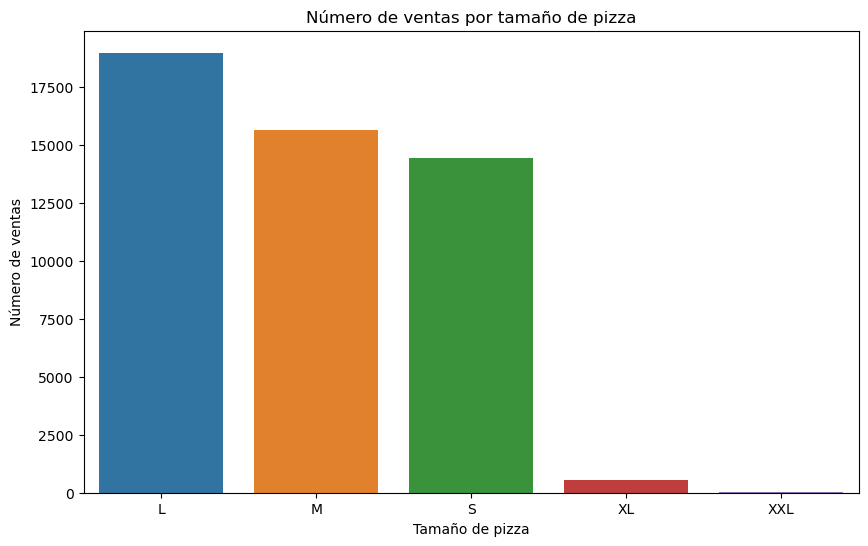

In [158]:
# Histograma de precios de las pizzas
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribución de precios de las pizzas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Número de ventas por tipo de pizza
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Número de ventas por tipo de pizza')
plt.xlabel('Tipo de pizza')
plt.ylabel('Número de ventas')
plt.xticks(rotation=45)
plt.show()

# Número de ventas por tamaño de pizza
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='size', order=df['size'].value_counts().index)
plt.title('Número de ventas por tamaño de pizza')
plt.xlabel('Tamaño de pizza')
plt.ylabel('Número de ventas')
plt.show()


##### Para predecir cuántas pizzas de cada tipo se van a vender a futuro, seguiremos un enfoque similar al anterior pero desglosaremos las ventas por tipo de pizza. Esto significa que nuestra variable dependiente (objetivo) será el número de ventas por tipo de pizza y la variable independiente será el tiempo (días desde una fecha de referencia).

* Criterios para la predicción
  * Variable independiente:
    * days (número de días desde una fecha de referencia).
  * Variable dependiente:
    * sales (número de ventas de cada tipo de pizza por día).
  * Agrupación de datos:
    * Los datos se agrupan por fecha y tipo de pizza para obtener el número de ventas diarias por tipo de pizza.
  * Modelo de regresión lineal:
    * Entrenamos un modelo de regresión lineal por cada tipo de pizza utilizando los días como variable predictora y el número de ventas como la variable objetivo.

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                49574 non-null  object        
 1   date              49574 non-null  datetime64[ns]
 2   time              49574 non-null  object        
 3   name              49574 non-null  object        
 4   size              49574 non-null  object        
 5   type              49574 non-null  object        
 6   price             49574 non-null  float64       
 7   name_description  49574 non-null  object        
 8   description       49574 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 3.4+ MB


In [161]:
# Paso 1: Seleccionar las características relevantes
features = ['size', 'price']  

# Paso 2: Codificar las variables categóricas ('size' y 'name')
df = pd.get_dummies(df, columns=['size', 'type'])

# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['size_L', 'size_M', 'size_S', 'size_XL', 'size_XXL', 'type_chicken', 'type_classic', 'type_supreme', 'type_veggie']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 6: Realizar predicciones
predictions = model.predict(X_test)

# Paso 7: Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r_squared}")

Error cuadrático medio (MSE): 2.0305883221487413
Coeficiente de determinación (R^2): 0.8476744157590447


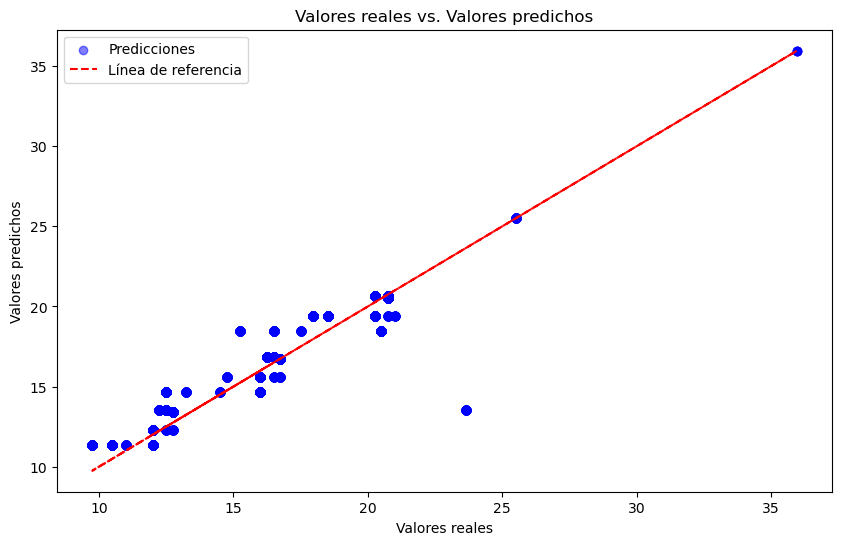

c:\Users\ivana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ivana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


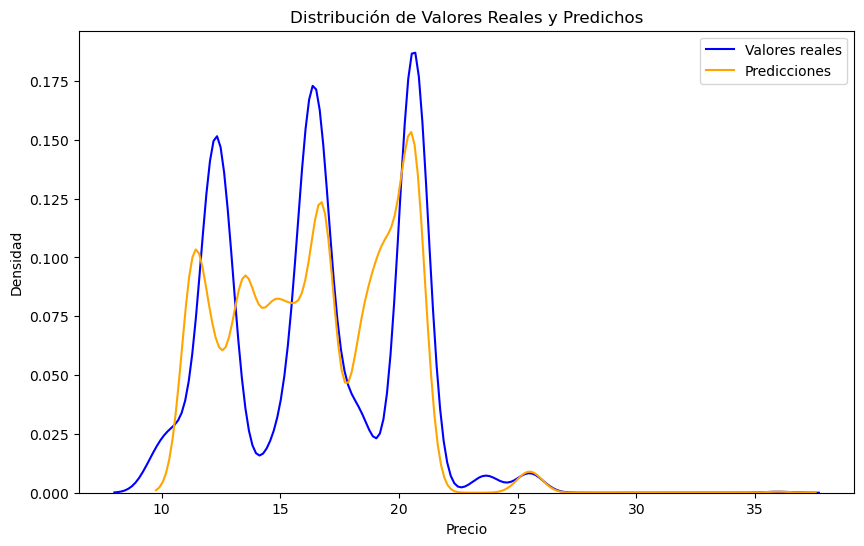

In [163]:
# Graficar valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5, label='Predicciones')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Línea de referencia')
plt.title('Valores reales vs. Valores predichos')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.legend()
plt.show()

# Graficar distribuciones de valores reales y predichos
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='blue', label='Valores reales', linestyle='-')
sns.kdeplot(predictions, color='orange', label='Predicciones', linestyle='-')
plt.title('Distribución de Valores Reales y Predichos')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [168]:
# Cargar los datos desde un archivo CSV
df = pd.read_csv('./A_year_of_pizza_sales_from_a_pizza_place_872_68.csv', index_col=False)

# Convertir la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Agregar los datos diarios (ventas totales por día)
daily_sales = df.groupby(['date', 'size']).size().reset_index(name='sales')

# Convertir la fecha a un formato numérico (días desde una fecha de referencia)
daily_sales['days'] = (daily_sales['date'] - daily_sales['date'].min()).dt.days

daily_sales.head()

,date,size,sales,days
0,2015-01-01,L,71,0
1,2015-01-01,M,48,0
2,2015-01-01,S,42,0
3,2015-01-01,XL,1,0
4,2015-01-02,L,77,1


In [169]:
# Paso 2: Codificar las variables categóricas ('size' y 'name')
daily_sales = pd.get_dummies(daily_sales, columns=['size',])

# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba
X = daily_sales[['size_L', 'size_M', 'size_S', 'size_XL', 'size_XXL', ]]
y = daily_sales['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 6: Realizar predicciones
predictions = model.predict(X_test)

# Paso 7: Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r_squared}")

Error cuadrático medio (MSE): 78.84698174469662
Coeficiente de determinación (R^2): 0.8061684596197276
